In [1]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plan

In [ ]:
!unzip new-plant-diseases-dataset.zip -d ./plant-diseases

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_/RS_Rust 2378.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_/RS_Rust 2378_flipLR.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_/RS_Rust 2382.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_/RS_Rust 2386_flipLR.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_/RS_Rust 2389.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_/RS_R

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
train_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
test_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

In [ ]:
class_names = os.listdir(train_dir)
print(class_names)

['Squash___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Potato___healthy', 'Pepper,_bell___healthy', 'Tomato___healthy', 'Apple___Black_rot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Raspberry___healthy', 'Tomato___Target_Spot', 'Grape___Esca_(Black_Measles)', 'Apple___healthy', 'Grape___healthy', 'Potato___Early_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Pepper,_bell___Bacterial_spot', 'Blueberry___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Orange___Haunglongbing_(Citrus_greening)', 'Strawberry___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Late_blight', 'Apple___Cedar_apple_rust', 'Grape___Black_rot', 'Cherry_(including_sour)___Powdery_mildew', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Soybean___healthy', 'Tomato___Leaf_Mold', 'Peach___Bacterial_spot', 'Apple___Apple_scab', 'Tomato___Tomato_mosaic_virus', 'Strawberry___Leaf_scorch', 'P

In [ ]:
print("Toplam sinif sayisi: {}".format(len(class_names)))

Toplam sinif sayisi: 38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in class_names:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
print(f"Veri setinde kullanilan bitkiler: \n{plants}")

Veri setinde kullanilan bitkiler: 
['Squash', 'Cherry_(including_sour)', 'Potato', 'Pepper,_bell', 'Tomato', 'Apple', 'Corn_(maize)', 'Raspberry', 'Grape', 'Blueberry', 'Orange', 'Strawberry', 'Soybean', 'Peach']


In [ ]:
print("Benzersiz bitki sayisi: {}".format(len(plants)))

Benzersiz bitki sayisi: 14


In [ ]:
diseased_plants = []

for plant in class_names:
    if plant.split('___')[1] != 'healthy':
        diseased_plants.append(plant)

print("Hastalıklı Bitkiler:")
for diseased_plant in diseased_plants:
    print(diseased_plant)

Hastalıklı Bitkiler:
Squash___Powdery_mildew
Apple___Black_rot
Corn_(maize)___Common_rust_
Tomato___Target_Spot
Grape___Esca_(Black_Measles)
Potato___Early_blight
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Pepper,_bell___Bacterial_spot
Corn_(maize)___Northern_Leaf_Blight
Tomato___Early_blight
Orange___Haunglongbing_(Citrus_greening)
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Tomato___Late_blight
Apple___Cedar_apple_rust
Grape___Black_rot
Cherry_(including_sour)___Powdery_mildew
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Leaf_Mold
Peach___Bacterial_spot
Apple___Apple_scab
Tomato___Tomato_mosaic_virus
Strawberry___Leaf_scorch
Potato___Late_blight
Tomato___Septoria_leaf_spot
Tomato___Bacterial_spot


In [ ]:
print("Hastalıklı Bitki Sayısı:", len(diseased_plants))

Hastalıklı Bitki Sayısı: 26


In [ ]:
healthy_plants = []

for plant in class_names:
    if plant.split('___')[1] == 'healthy':
        healthy_plants.append(plant)

# Sağlıklı bitki adlarını yazdır
print("Sağlıklı Bitkiler:")
for healthy_plant in healthy_plants:
    print(healthy_plant)


Sağlıklı Bitkiler:
Cherry_(including_sour)___healthy
Potato___healthy
Pepper,_bell___healthy
Tomato___healthy
Corn_(maize)___healthy
Raspberry___healthy
Apple___healthy
Grape___healthy
Blueberry___healthy
Strawberry___healthy
Soybean___healthy
Peach___healthy


In [ ]:
print("Sağlıklı Bitki Sayısı:", len(healthy_plants))

Sağlıklı Bitki Sayısı: 12


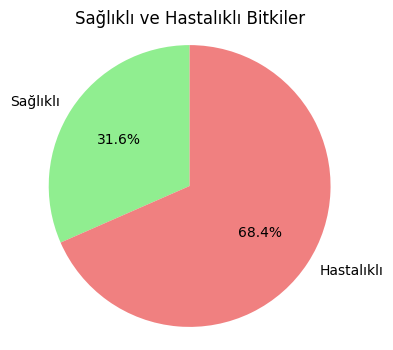

In [ ]:
import matplotlib.pyplot as plt

healthy_count = 0
diseased_count = 0

for plant in class_names:
    if plant.split('___')[1] == 'healthy':
        healthy_count += 1
    else:
        diseased_count += 1

plt.figure(figsize=(4, 4))

labels = ['Sağlıklı', 'Hastalıklı']
sizes = [healthy_count, diseased_count]
colors = ['lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sağlıklı ve Hastalıklı Bitkiler')
plt.axis('equal')

plt.show()


In [ ]:
import os
import pandas as pd

train_nums = {}
test_nums = {}

for disease in os.listdir(train_dir):
    if os.path.isdir(os.path.join(train_dir, disease)):
        train_nums[disease] = len(os.listdir(os.path.join(train_dir, disease)))

for disease in os.listdir(test_dir):
    if os.path.isdir(os.path.join(test_dir, disease)):
        test_nums[disease] = len(os.listdir(os.path.join(test_dir, disease)))

total_nums = {disease: train_nums.get(disease, 0) + test_nums.get(disease, 0) for disease in set(train_nums) | set(test_nums)}

img_per_class = pd.DataFrame(total_nums.values(), index=total_nums.keys(), columns=["Bitki Sayısı"])
print(img_per_class)

                                                    Bitki Sayısı
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                  2152
Tomato___healthy                                            2407
Tomato___Late_blight                                        2314
Potato___Late_blight                                        2424
Corn_(maize)___healthy                                      2324
Grape___Esca_(Black_Measles)                                2400
Apple___healthy                                             2510
Potato___Early_blight                                       2424
Strawberry___healthy                                        2280
Apple___Cedar_apple_rust                                    2200
Corn_(maize)___Northern_Leaf_Blight                         2385
Raspberry___healthy                                         2226
Tomato___Leaf_Mold                                          2352
Cherry_(including_sour)___healthy                           2282
Tomato___Tomato_Yellow_Le

In [ ]:
test_images = sum(test_nums.values())
train_images = sum(train_nums.values())
total_images = sum(total_nums.values())

print("Toplam Test Sayısı:", test_images)
print("Toplam Eğitim Sayısı:", train_images)
print("Toplam Resim Sayısı:", total_images)

Toplam Test Sayısı: 17572
Toplam Eğitim Sayısı: 70295
Toplam Resim Sayısı: 87867


Text(0.5, 1.0, 'Her bitki hastalığı sınıfına göre görüntüler')

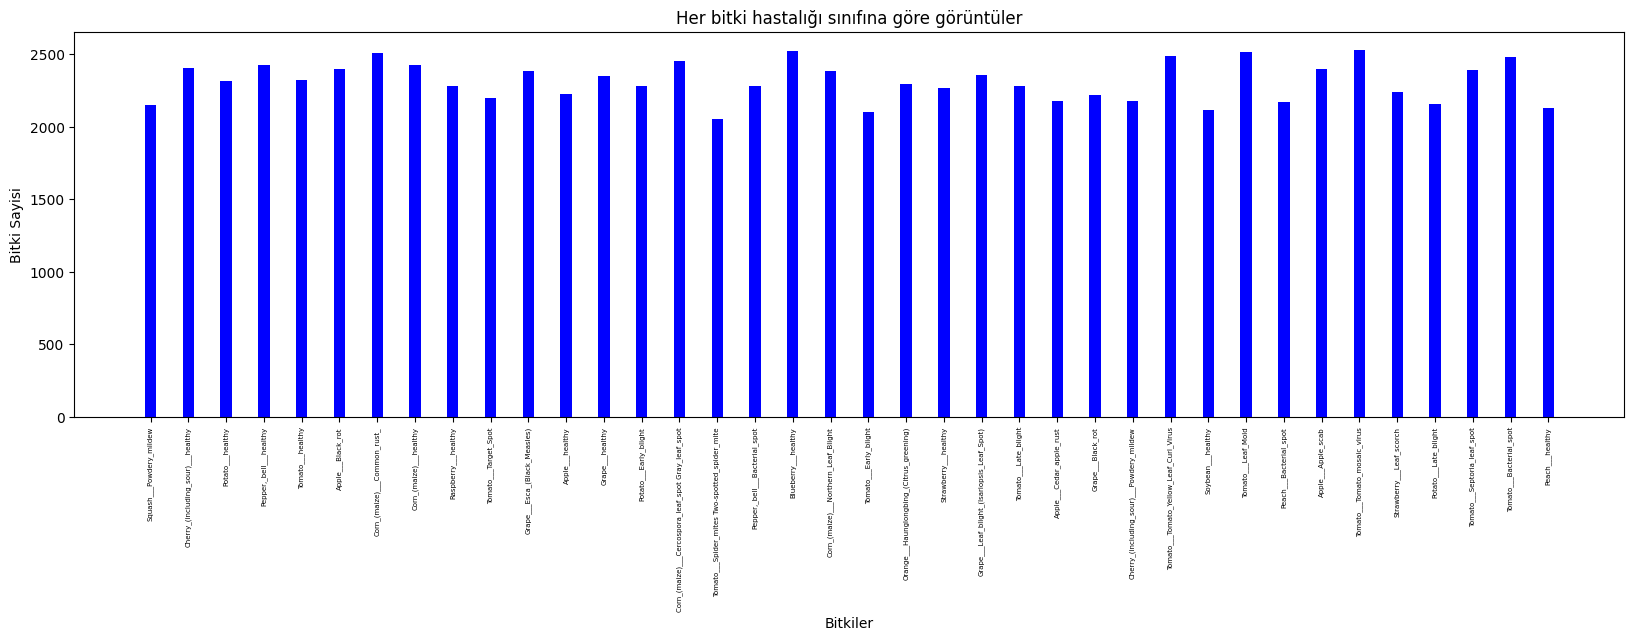

In [ ]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in total_nums.values()], width=0.3, color='blue')
plt.xlabel('Bitkiler', fontsize=10)
plt.ylabel('Bitki Sayisi', fontsize=10)
plt.xticks(index, class_names, fontsize=5, rotation=90)
plt.title('Her bitki hastalığı sınıfına göre görüntüler')

In [ ]:
plt.figure(figsize=(40,30))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i, class_name in enumerate(class_names):
    class_folder_path = os.path.join(train_dir, class_name)
    random_image = np.random.randint(0, len(os.listdir(class_folder_path)))
    random_image_path = os.path.join(class_folder_path, os.listdir(class_folder_path)[random_image])

    image = cv2.imread(random_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(6, 7, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(class_name)

plt.show()


Output hidden; open in https://colab.research.google.com to view.